In [1]:
import os

import numpy as np

import keras
from keras import layers
from keras import optimizers

import matplotlib.pyplot as plt

In [2]:
# project variables
VISUALIZATION_DIR = os.path.join(os.getcwd(), 'visualizations')
TRAIN_DIR = os.path.join(os.getcwd(), 'data/sorted')

MODEL_NAME = 'catgreeter_model.h5'

# fixed parameters
NUM_CLASSES = 3
N = 395 # total number of labeled datapoints
class_names = [
    'temari',
    'zinc',
    'selenium'
]

# class_names = [c + '/' for c in class_names]

# hyperparameters
BATCH_SIZE = 32

In [3]:
# build model # based off of Chollet Listing 5.13
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), # 32 filters, 3x3 kernel size
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(), # lose one dimension
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ]
)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

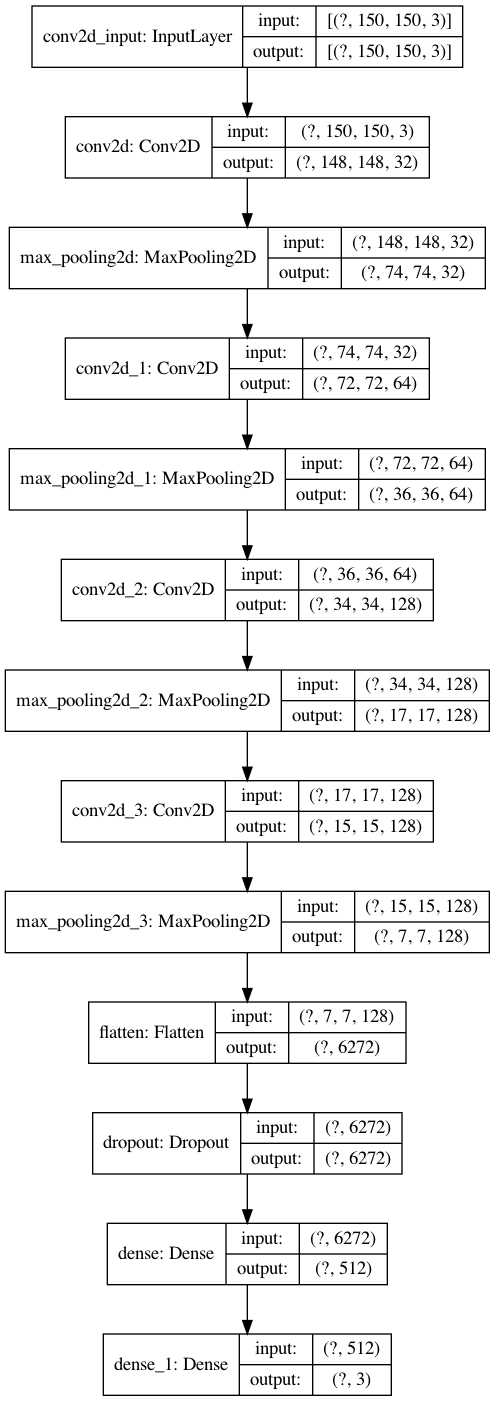

In [5]:
# plot the model 
dot_img_file = os.path.join(VISUALIZATION_DIR, 'model_architecture.png')
keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [8]:
# initialize data augmentation/generator 
# (based off of listing 5.14 in Chollet)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    validation_split = 0.2,
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training' # set as training data
)

validation_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' # set as training data
)

Found 318 images belonging to 3 classes.
Found 77 images belonging to 3 classes.


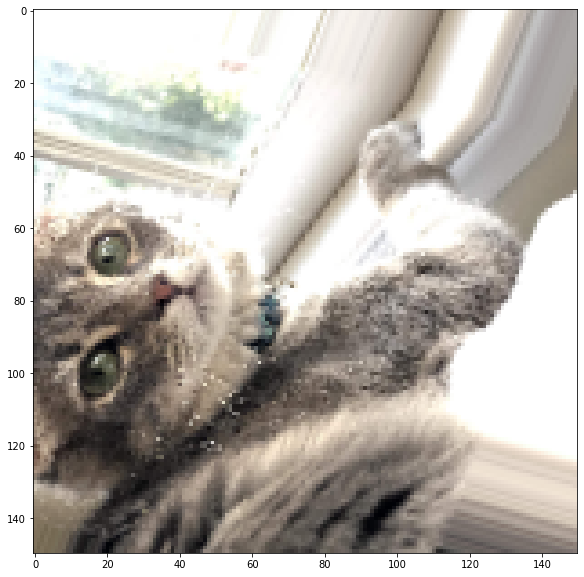

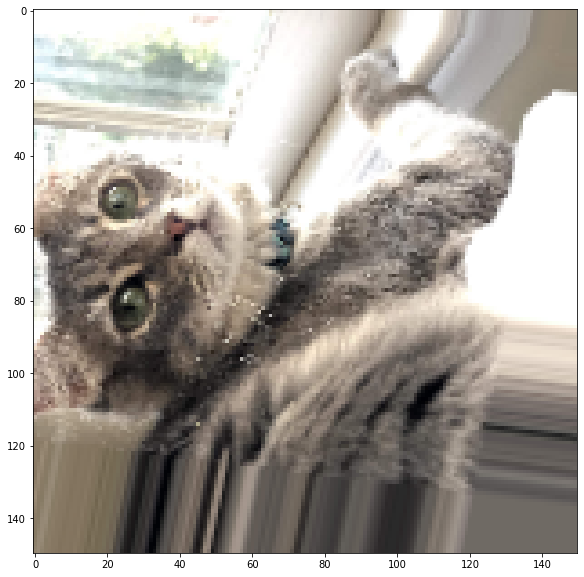

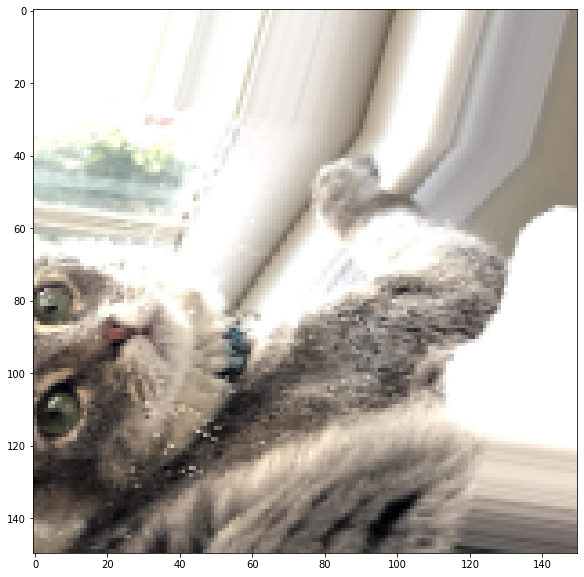

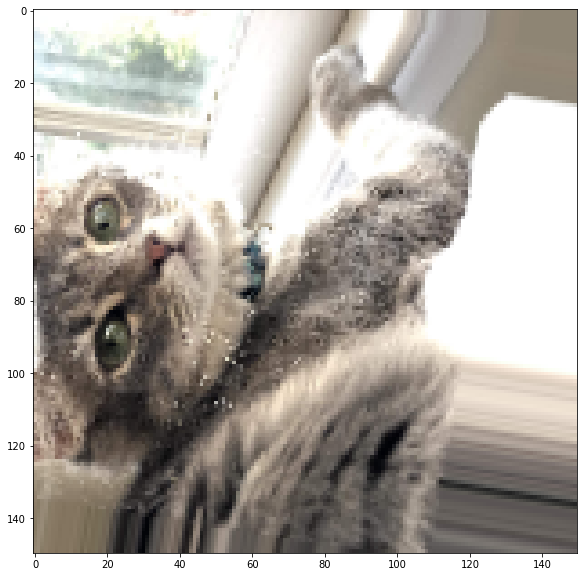

In [9]:
# display some randomly augmented training images
from keras.preprocessing import image

shown_class = class_names[np.random.randint(NUM_CLASSES)]
shown_class_dir = os.path.join(TRAIN_DIR, shown_class)

fnames = [os.path.join(shown_class_dir, fname) for fname in os.listdir(shown_class_dir)]

img_path = fnames[3] # choose one img to augment

img = image.load_img(img_path, target_size=(150, 150)) # read the img and resize

x = image.img_to_array(img) # converts to np array with correct shape

x = x.reshape((1,) + x.shape) # reshape

i = 0
for batch in datagen.flow(x, batch_size=1): # generate batches of randomly transformed imgs
    plt.figure(i, figsize=(16,10))
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [12]:
# fit to training data
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//BATCH_SIZE,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//BATCH_SIZE
)

Epoch 1/100
9/9 [==============================] - 32s 4s/step - loss: 0.8808 - acc: 0.6573 - val_loss: 0.8815 - val_acc: 0.6875
Epoch 2/100
9/9 [==============================] - 33s 4s/step - loss: 0.8820 - acc: 0.6608 - val_loss: 0.8959 - val_acc: 0.6719
Epoch 3/100
9/9 [==============================] - 31s 3s/step - loss: 0.8838 - acc: 0.6538 - val_loss: 0.8765 - val_acc: 0.6875
Epoch 4/100
9/9 [==============================] - 34s 4s/step - loss: 0.8167 - acc: 0.6713 - val_loss: 0.8274 - val_acc: 0.7188
Epoch 5/100
9/9 [==============================] - 35s 4s/step - loss: 0.8321 - acc: 0.6853 - val_loss: 0.8689 - val_acc: 0.6719
Epoch 6/100
9/9 [==============================] - 36s 4s/step - loss: 0.8582 - acc: 0.6643 - val_loss: 0.8643 - val_acc: 0.6875
Epoch 7/100
9/9 [==============================] - 36s 4s/step - loss: 0.8316 - acc: 0.6713 - val_loss: 0.7841 - val_acc: 0.7188
Epoch 8/100
9/9 [==============================] - 34s 4s/step - loss: 0.8282 - acc: 0.6875 - val

9/9 [==============================] - 30s 3s/step - loss: 0.4369 - acc: 0.8357 - val_loss: 0.9220 - val_acc: 0.7188
Epoch 65/100
9/9 [==============================] - 30s 3s/step - loss: 0.5075 - acc: 0.8182 - val_loss: 0.6539 - val_acc: 0.7344
Epoch 66/100
9/9 [==============================] - 30s 3s/step - loss: 0.4827 - acc: 0.7972 - val_loss: 0.6908 - val_acc: 0.7812
Epoch 67/100
9/9 [==============================] - 31s 3s/step - loss: 0.4988 - acc: 0.8217 - val_loss: 0.5845 - val_acc: 0.8281
Epoch 68/100
9/9 [==============================] - 30s 3s/step - loss: 0.5100 - acc: 0.8112 - val_loss: 0.6475 - val_acc: 0.7812
Epoch 69/100
9/9 [==============================] - 30s 3s/step - loss: 0.4752 - acc: 0.8042 - val_loss: 0.7170 - val_acc: 0.7344
Epoch 70/100
9/9 [==============================] - 30s 3s/step - loss: 0.4289 - acc: 0.8427 - val_loss: 0.6587 - val_acc: 0.7656
Epoch 71/100
9/9 [==============================] - 31s 3s/step - loss: 0.4175 - acc: 0.8357 - val_loss

In [13]:
# save the model
model.save(MODEL_NAME)

{'loss': [0.8808432221412659,
  0.881980299949646,
  0.8838365077972412,
  0.8167259693145752,
  0.8320609927177429,
  0.8581674098968506,
  0.831592321395874,
  0.8282068371772766,
  0.8155902028083801,
  0.7856511473655701,
  0.7993273735046387,
  0.7884790897369385,
  0.7817990183830261,
  0.7825766801834106,
  0.7412077784538269,
  0.7111859321594238,
  0.7623350620269775,
  0.6825621128082275,
  0.6956762671470642,
  0.6782964468002319,
  0.6930403113365173,
  0.660404622554779,
  0.6641033887863159,
  0.6684913039207458,
  0.7186517715454102,
  0.6304466724395752,
  0.6116684675216675,
  0.6472569704055786,
  0.644390344619751,
  0.6150755882263184,
  0.628598690032959,
  0.6264570355415344,
  0.6053063869476318,
  0.6204273104667664,
  0.6183593273162842,
  0.6065955758094788,
  0.5815103650093079,
  0.6087749600410461,
  0.5516225099563599,
  0.5741145610809326,
  0.568042516708374,
  0.5571169257164001,
  0.535259485244751,
  0.5286960005760193,
  0.5935304164886475,
  0.51287

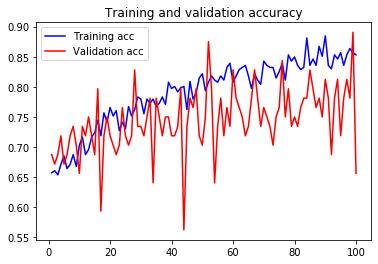

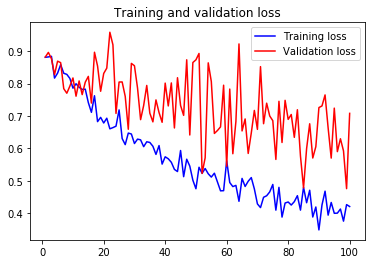

In [15]:
# display curves of loss, accuracy during training

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_acc, 'r-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
import cv2
model.predict()

TypeError: predict() missing 1 required positional argument: 'x'

In [ ]:
import cv2
import numpy as np
from PIL import Image
from keras import models

#Load the saved model
model = models.load_model('catgreeter_model.h5')
video = cv2.VideoCapture(0)

while True:
        _, frame = video.read()

        #Convert the captured frame into RGB
        im = Image.fromarray(frame, 'RGB')

        #Resizing into 150x150 because we trained the model with this image size.
        im = im.resize((150,150))
        img_array = np.array(im)

        #Our keras model used a 4D tensor, (images x height x width x channel)
        #So changing dimension 128x128x3 into 1x128x128x3 
        img_array = np.expand_dims(img_array, axis=0)
        
        print(model.predict(img_array))

        #Calling the predict method on model to predict 'me' on the image
        prediction = int(model.predict(img_array)[0][0])

        #if prediction is 0, which means I am missing on the image, then show the frame in gray color.
        if prediction == 0:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        cv2.imshow("Capturing", frame)
        key=cv2.waitKey(1)
        if key == ord('q'):
                break
video.release()
cv2.destroyAllWindows()

[[4.2010733e-09 9.9998462e-01 1.5345207e-05]]
